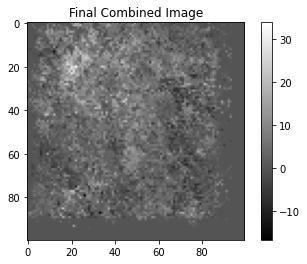

In [51]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 27 14:49:12 2024

@author: ChatGPT4
"""

import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter, shift, center_of_mass

# Load bad pixel mask
bad_pixels = np.loadtxt('badpixel.mask')

#values in this data run from 1 to 100 whereas indexes of the arrays they corrspeond to run from 0 to 99
for i in range(bad_pixels.shape[0]):
    for j in range(bad_pixels.shape[1]):
        bad_pixels[i,j] = bad_pixels[i,j]-1

def interpolate_bad_pixels(image, bad_pixels):
    """Interpolate bad pixels using the median of neighboring pixels."""
    for x, y in bad_pixels:
        image[int(x), int(y)] = np.median(image[max(0, int(x)-1):int(x)+2, max(0, int(y)-1):int(y)+2])
    return image

def remove_cosmic_rays(image, threshold=5000):
    """Remove cosmic ray hits by detecting and interpolating bright pixels."""
    cosmic_rays = np.where(image > threshold)
    for x, y in zip(*cosmic_rays):
        image[x, y] = np.median(image[max(0, x-1):x+2, max(0, y-1):y+2])
    return image

def subtract_sky(image):
    """Subtract the sky background by averaging non-object pixels."""
    # Masking bright sources (astronomical objects)
    sky_mask = image < np.percentile(image, 90)  # Adjust threshold as needed
    sky_background = np.mean(image[sky_mask])
    return image - sky_background

def find_centroid(image):
    """Find the centroid of the brightest object in the image."""
    threshold = np.percentile(image, 99)  # Assuming the object is one of the brightest points
    object_mask = image > threshold
    return center_of_mass(object_mask)

def process_image(image, bad_pixels):
    """Process a single image by applying bad-pixel interpolation, cosmic ray removal, and sky subtraction."""
    cleaned_image = interpolate_bad_pixels(image, bad_pixels)
    cleaned_image = remove_cosmic_rays(cleaned_image)
    sky_subtracted_image = subtract_sky(cleaned_image)
    return sky_subtracted_image

def combine_images(images):
    """Combine multiple images by taking the median value at each pixel."""
    return np.median(images, axis=0)

# Load and process all images
image_list = []
for i in range(1, 26):
    # Construct the filename (image01.fits to image25.fits)
    filename = f'image{i:02d}.fits'
    
    # Load the image
    image_data = fits.getdata(filename)
    
    # Process the image
    processed_image = process_image(image_data, bad_pixels)
    
    # Append the processed image to the list
    image_list.append(processed_image)

# Determine offsets and align images
aligned_images = []
reference_centroid = find_centroid(image_list[0])

for image in image_list:
    # Calculate the offset from the reference image
    centroid = find_centroid(image)
    offset = np.array(centroid) - np.array(reference_centroid)
    
    # Align the image
    aligned_image = shift(image, offset)
    aligned_images.append(aligned_image)

# Combine all aligned images
final_image = combine_images(aligned_images)

# Display the final combined image
plt.imshow(final_image, cmap='gray')
plt.colorbar()
plt.title('Final Combined Image')
plt.show()

# Optionally save the final image as a new FITS file
hdu = fits.PrimaryHDU(final_image)
hdu.writeto('final_combined_image.fits', overwrite=True)


[[4571.07   4637.783  4469.141  ... 4527.897  4583.916  4563.6772]
 [4524.867  4592.2676 4574.6587 ... 4472.9536 4477.025  4521.5615]
 [4548.158  4594.1055 4529.223  ... 4505.883  4546.014  4517.217 ]
 ...
 [4513.039  4529.1875 4486.8384 ... 4488.5195 4573.583  4535.0923]
 [4580.423  4566.706  4502.127  ... 4520.2314 4510.146  4523.1504]
 [4601.6455 4606.7935 4570.042  ... 4540.006  4536.2485 4512.341 ]]
[[ 4902.0537  5028.572   5049.1943 ...  4896.725   4960.709   4950.9795]
 [ 4873.207   4903.909   4910.5    ...  5041.3545 11578.834   4891.5107]
 [ 4928.4414  4961.7925  4862.517  ...  4922.233   4856.0996  4943.9375]
 ...
 [ 4866.6953  4928.5796  4925.717  ...  5011.3306  4879.505   4972.799 ]
 [ 4900.3105  4958.694   4938.6196 ...  4898.315   5040.7188  5011.4873]
 [ 4935.9443  4994.546   4989.0923 ...  4933.5195  4987.0693  4962.0645]]
(100, 100)


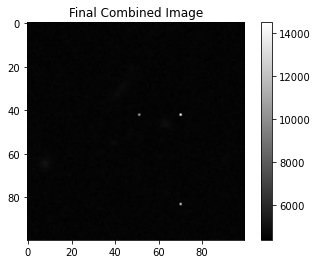

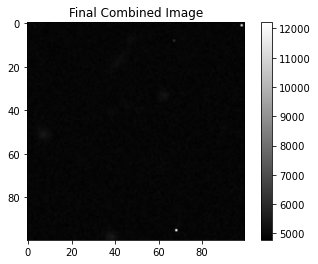

4909.3433
4573.42
4504.0825
4589.7256


In [100]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.ndimage import median_filter, shift, center_of_mass

# Load bad pixel mask
bad_pixels = np.loadtxt('badpixel.mask')

#values in this data run from 1 to 100 whereas indexes of the arrays they corrspeond to run from 0 to 99
for i in range(bad_pixels.shape[0]):
    for j in range(bad_pixels.shape[1]):
        bad_pixels[i,j] = bad_pixels[i,j]-1


image_list = []
for i in range(1, 26):
    
    # Construct the filename (image01.fits to image25.fits)
    filename = f'image{i:02d}.fits'
    
    # Load the image
    image_data = fits.getdata(filename)
    
    image_list.append(image_data)


image_1 = image_list[0]
image_10 = image_list[10]
image_11 = image_list[11]
image_12 = image_list[12]

print(image_1)
print(image_10)
print(image_1.shape)



final_image = combine_images(image_data)
# Display the final combined image



plt.imshow(image_1, cmap='gray')
plt.colorbar()
plt.title('Final Combined Image')
plt.show()


plt.imshow(image_10, cmap='gray')
plt.colorbar()
plt.title('Final Combined Image')
plt.show()



print(image_10[20, 1])

print(image_1[22, 19])
print(image_1[19, 22])
print(image_1[19, 56])

4573.419921875
4547.103515625
4543.8154296875


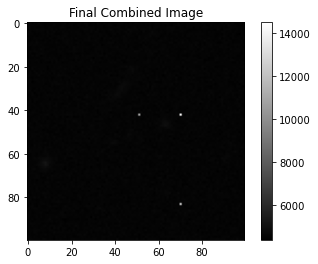

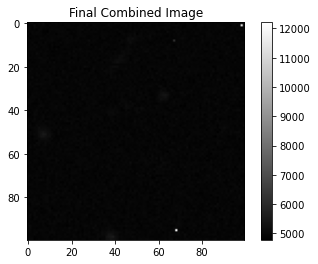

In [117]:
def interpolate_bad_pixels(image, bad_pixels):
    """Interpolate bad pixels using the median of neighboring pixels."""
    for x, y in bad_pixels:
        if x == 19:     #if x=19 the code only averages the pixels in vertical slice around the bad pixel, 
                        #, as x =19 is a row of bad pixels so dont want to average using horizontally , 
                        #, neighbouring bad pixels
            image[int(x), int(y)] = np.median(image[max(0, int(y)-2):int(y)+3])
        else:
            image[int(x), int(y)] = np.median(image[max(0, int(x)-1):int(x)+2, max(0, int(y)-1):int(y)+2])
    return image


def remove_cosmic_rays(image, threshold=5000):
    """Remove cosmic ray hits by detecting and interpolating bright pixels."""
    cosmic_rays = np.where(image > threshold)
    for x, y in zip(*cosmic_rays):
        image[x, y] = np.median(image[max(0, x-1):x+2, max(0, y-1):y+2])
    return image

def process_image(image, bad_pixels):
    """Process a single image by applying bad-pixel interpolation, cosmic ray removal, and sky subtraction."""
    cleaned_image = interpolate_bad_pixels(image, bad_pixels)
    cleaned_image = remove_cosmic_rays(cleaned_image)
    
    return cleaned_image


image_list = np.zeros([26,100,100])
for i in range(1, 26):
    # Construct the filename (image01.fits to image25.fits)
    filename = f'image{i:02d}.fits'
    

    
    # Load the image
    image_data = fits.getdata(filename)
    
   
    # Process the image
    interpolated_image = interpolate_bad_pixels(image_data, bad_pixels)
    for j in range(100):
        for k in range(100):
    # Append the processed image to the list
            image_list[i-1,j,k] = interpolated_image[j,k]
    



image_1 = image_list[0]
image_10 = image_list[10]
image_11 = image_list[11]
image_12 = image_list[12]



print(image_1[22, 19])
print(image_1[19, 22])
print(image_1[19, 56])

plt.imshow(image_1, cmap='gray')
plt.colorbar()
plt.title('Final Combined Image')
plt.show()


plt.imshow(image_10, cmap='gray')
plt.colorbar()
plt.title('Final Combined Image')
plt.show()



plt.show()

(26, 100, 100)


Text(0, 0.5, 'Pixel inensity')

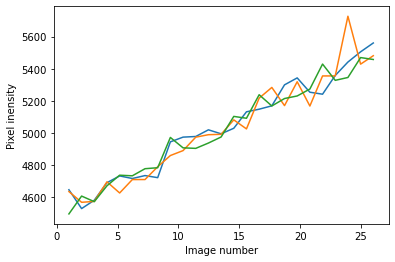

In [125]:
print(image_list.shape)
image_number = np.linspace(1,26,25)

array1 = np.zeros(25)
array2 = np.zeros(25)
array3 = np.zeros(25)

for i in range(25):
    array1[i] = image_list[i,50,50]
    array2[i] = image_list[i,20,50]
    array3[i] = image_list[i,50,20]


plt.plot(image_number,array1)
plt.xlabel("Image number")
plt.ylabel("Pixel inensity")

plt.plot(image_number,array2)
plt.xlabel("Image number")
plt.ylabel("Pixel inensity")

plt.plot(image_number,array3)
plt.xlabel("Image number")
plt.ylabel("Pixel inensity")